In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from datetime import datetime

In [2]:
## Read data
import os
print(os.getcwd())

/Users/kunalchakraborty/Downloads/industry_project_HQ


In [11]:
### Load training data
data = pd.read_csv("data/ag_transformed_features.csv")
## Transform date
data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").date())

In [12]:
data.head()

,date,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
0,1959-01-01,55.42,1.75667,2.96333,0.502896,0.0282,0.0412,0.0487,0.0408,0.027736,...,0.005395,NaN,NaN,-3.451521,NaN,-2.928627,-0.522894,0.0126,0.0075,0.0052
1,1959-02-01,55.41,1.76333,3.03667,0.494946,0.0270,0.0414,0.0489,0.0402,0.027899,...,0.002210,0.002471,0.000571,-3.447556,-3.447736,-2.903999,-0.543557,0.0132,0.0075,0.0009
2,1959-03-01,55.44,1.77000,3.11000,0.516860,0.0280,0.0413,0.0485,0.0403,0.024984,...,0.000826,0.003203,0.001003,-3.444322,-3.443781,-2.880679,-0.563643,0.0123,0.0072,-0.0100
3,1959-04-01,57.59,1.77667,3.20667,0.498597,0.0295,0.0423,0.0486,0.0414,0.024361,...,0.039093,0.041451,0.039451,-3.478608,-3.440561,-2.888116,-0.590492,0.0119,0.0063,-0.0055
4,1959-05-01,58.68,1.78333,3.30333,0.483077,0.0284,0.0437,0.0496,0.0417,0.025887,...,0.019043,0.021507,0.019307,-3.493617,-3.474867,-2.877168,-0.616449,0.0133,0.0059,-0.0109


## Make two training schemes

- Scheme 1: One time training upto a certain date. Forecast on the rest
- Scheme 2: Rolling training and rolling forecasting

In [36]:
used_features = ["dfy", "infl", "svar", "d/e", "lty", "tms", "tbl", "dfr", "d/p", "d/y", "ltr", "e/p"]
target = ["premium"]

In [13]:
data.set_index("date", inplace=True)

In [14]:
data[data.index > datetime(2020,1,1).date()]

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,...,CRSP_SPvwx,returns,premium,d/p,d/y,e/p,d/e,tms,dfy,dfr
date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,2954.22,59.133943,124.043333,0.247223,0.0152,0.0278,0.0361,0.0150,-0.005586,0.0012,...,-0.084080,-0.082583,-0.083783,-3.911185,-3.999044,-3.170359,-0.740826,-0.0002,0.0083,-0.0308
2020-03-01,2584.59,59.580604,116.330000,NaN,0.0029,0.0302,0.0429,0.0087,-0.007731,0.0012,...,-0.123686,-0.123439,-0.124639,-3.769992,-3.903660,-3.100891,-0.669101,0.0058,0.0127,-0.0976
2020-04-01,2912.43,59.614873,110.630000,NaN,0.0014,0.0243,0.0413,0.0066,-0.010565,0.0000,...,0.127654,0.128766,0.128766,-3.888838,-3.769417,-3.270552,-0.618286,0.0052,0.0170,0.0265
2020-05-01,3044.31,59.649142,104.930000,NaN,0.0013,0.0250,0.0395,0.0067,-0.014967,0.0001,...,0.045587,0.046989,0.046889,-3.932550,-3.888263,-3.367736,-0.564814,0.0054,0.0145,0.0181
2020-06-01,3100.29,59.683412,99.230000,NaN,0.0016,0.0244,0.0364,0.0073,-0.016845,0.0001,...,0.018885,0.020022,0.019922,-3.950197,-3.931975,-3.441811,-0.508386,0.0057,0.0120,0.0123
2020-07-01,3271.12,59.406020,98.893333,NaN,0.0013,0.0214,0.0331,0.0062,-0.011998,0.0001,...,0.055682,0.056698,0.056598,-4.008492,-3.954855,-3.498846,-0.509646,0.0049,0.0117,0.0323
2020-08-01,3500.31,59.128628,98.556667,NaN,0.0010,0.0225,0.0327,0.0065,-0.008504,0.0001,...,0.070308,0.071571,0.071471,-4.080892,-4.013173,-3.569975,-0.510916,0.0055,0.0102,-0.0139
2020-09-01,3363.00,58.851237,98.220000,NaN,0.0011,0.0231,0.0336,0.0068,-0.005698,0.0001,...,-0.039366,-0.037827,-0.037927,-4.045576,-4.085594,-3.533379,-0.512197,0.0057,0.0105,-0.0039
2020-10-01,3269.96,58.660440,96.856667,NaN,0.0010,0.0235,0.0344,0.0079,-0.001895,0.0001,...,-0.027507,-0.026212,-0.026312,-4.020767,-4.048823,-3.519301,-0.501467,0.0069,0.0109,0.0048


In [38]:
def start_stop_training(data, target_col, start_date, end_date, normalize=True):
    # Dropping Na here
    
    ## Preprocessing steps!?
    ## Just normalization should be enough !
    data = data.dropna()
    train_data = data[(data.index >= start_date) & (data.index < end_date)]
    test_data = data[data.index >= end_date]
    
    # Make sure the target column is at the last
    columns = data.columns.tolist()
    columns.remove(target_col)
    columns.append(target_col)
    
    train_data = train_data[columns]
    test_data = test_data[columns]
    
    from sklearn.preprocessing import normalize
    
    train_data = normalize(train_data)
    train_target = train_data[:,-1]
    train_data = train_data[:,:-1]
    
    test_data = normalize(test_data)
    test_target = test_data[:,-1]
    test_data = test_data[:,:-1]
    return [(train_data, train_target), (test_data, test_target)]

### Linear Models Sklearn

In [32]:
from sklearn import linear_model

In [79]:
reg = linear_model.LinearRegression()
lasso = linear_model.Lasso(alpha=0.5)
ridge = linear_model.Ridge(alpha=0.5)
elasticnet = linear_model.ElasticNet()

In [34]:
### Use the same training set
start_date = datetime(1960,1,1).date()
end_date = datetime(1999,12,1).date()
normalize= True

In [39]:
train_data, test_data = start_stop_training(data[used_features + target], target_col="premium",
                                           start_date=start_date, end_date=end_date)

In [46]:
def model_training(model_dict, train_set, test_set, feature_names, target_name = "y_actual"):
    """
    model : A dictionary with model name and model class object
    train_set: A tuple with training set and labels
    test_set : A tuple with test set and test labels
    """
    train_data = pd.DataFrame(train_set[0])
    train_data.columns = feature_names
    
    test_data = pd.DataFrame(test_set[0])
    test_data.columns = feature_names
    
    empty_df = pd.DataFrame()
    test_col_name = []
    for model_name, model in model_dict.items():
        model.fit(train_data, train_set[1])
        predictions = model.predict(test_set[0])
        test_col_name.append("{}_pred".format(model_name))
        empty_df["{}_pred".format(model_name)] = predictions
    empty_df[target_name] = test_set[1]
    return empty_df

In [47]:
model_dict = {}
model_dict["regression"] = reg
model_dict["lasso"] = lasso
model_dict["ridge"] = ridge

In [48]:
empty_df = model_training(model_dict, train_data, test_data, used_features)

In [64]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [65]:
## 
def performace_metrics(yactual, ypred_list, prediction_names_list):
    # RMSE, MAE, R2
    r2_list = []
    mae_list = []
    rmse_list = []
    mape_list = []
    
    for pred in ypred_list:
        r2_list.append(r2_score(yactual, pred))
        mae_list.append(mean_absolute_error(yactual, pred))
        mape_list.append(mean_absolute_percentage_error(yactual, pred))
        rmse_list.append(mean_squared_error(yactual, pred))

    metric_names = ["R2 coeff","mae", "mape", "rmse"]
    results = pd.DataFrame([r2_list, mae_list, mape_list, rmse_list]).T
    results.columns = metric_names
    results.index = prediction_names_list
    return results

In [66]:
performace_metrics(empty_df["y_actual"], empty_df[empty_df.columns.tolist()[:-1]].transpose().values.tolist(),
                  empty_df.columns.tolist()[:-1])

,R2 coeff,mae,mape,rmse
regression_pred,0.980478,0.000470,0.553834,8.867479e-07
lasso_pred,-0.000473,0.005012,1.593988,4.544509e-05
ridge_pred,0.047713,0.004885,1.432659,4.325631e-05


<IPython.core.display.Javascript object>


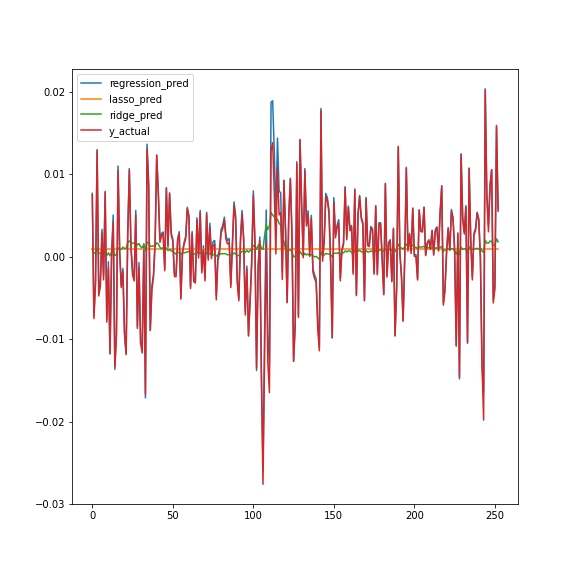

<AxesSubplot:>

In [75]:
empty_df.plot(figsize=(8,8))

In [76]:
## Use boosting and random forest models
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

rf = RandomForestRegressor()
et = ExtraTreesRegressor()

In [107]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(verbose=False)

In [108]:
model_dict["random_forest"] = rf
model_dict["extratrees"] = et
model_dict["catboost"] = cat
model_dict["elasticnet"] = elasticnet

In [81]:
prediction_df = model_training(model_dict,train_data, test_data, used_features)

Learning rate set to 0.034237
0:	learn: 0.0076857	total: 60.6ms	remaining: 1m
1:	learn: 0.0075469	total: 61.8ms	remaining: 30.8s
2:	learn: 0.0074073	total: 62.9ms	remaining: 20.9s
3:	learn: 0.0072668	total: 64.1ms	remaining: 16s
4:	learn: 0.0071385	total: 65.3ms	remaining: 13s
5:	learn: 0.0070286	total: 66.4ms	remaining: 11s
6:	learn: 0.0068989	total: 67.6ms	remaining: 9.59s
7:	learn: 0.0068028	total: 68.6ms	remaining: 8.5s
8:	learn: 0.0067072	total: 69.7ms	remaining: 7.68s
9:	learn: 0.0065932	total: 70.9ms	remaining: 7.02s
10:	learn: 0.0064933	total: 72ms	remaining: 6.47s
11:	learn: 0.0063995	total: 73.1ms	remaining: 6.02s
12:	learn: 0.0062905	total: 74.2ms	remaining: 5.63s
13:	learn: 0.0062065	total: 75.1ms	remaining: 5.29s
14:	learn: 0.0060930	total: 76.4ms	remaining: 5.02s
15:	learn: 0.0059948	total: 77.3ms	remaining: 4.76s
16:	learn: 0.0058972	total: 78.3ms	remaining: 4.53s
17:	learn: 0.0057974	total: 79.2ms	remaining: 4.32s
18:	learn: 0.0057077	total: 80.1ms	remaining: 4.14s
19:	

274:	learn: 0.0007033	total: 381ms	remaining: 1s
275:	learn: 0.0007023	total: 383ms	remaining: 1s
276:	learn: 0.0006984	total: 384ms	remaining: 1s
277:	learn: 0.0006974	total: 385ms	remaining: 1000ms
278:	learn: 0.0006965	total: 386ms	remaining: 999ms
279:	learn: 0.0006920	total: 388ms	remaining: 998ms
280:	learn: 0.0006910	total: 389ms	remaining: 996ms
281:	learn: 0.0006856	total: 391ms	remaining: 995ms
282:	learn: 0.0006812	total: 392ms	remaining: 993ms
283:	learn: 0.0006757	total: 393ms	remaining: 991ms
284:	learn: 0.0006705	total: 395ms	remaining: 991ms
285:	learn: 0.0006666	total: 397ms	remaining: 990ms
286:	learn: 0.0006630	total: 398ms	remaining: 988ms
287:	learn: 0.0006599	total: 399ms	remaining: 987ms
288:	learn: 0.0006549	total: 400ms	remaining: 985ms
289:	learn: 0.0006515	total: 401ms	remaining: 983ms
290:	learn: 0.0006464	total: 402ms	remaining: 981ms
291:	learn: 0.0006456	total: 404ms	remaining: 979ms
292:	learn: 0.0006410	total: 405ms	remaining: 978ms
293:	learn: 0.000640

432:	learn: 0.0003949	total: 573ms	remaining: 751ms
433:	learn: 0.0003947	total: 575ms	remaining: 750ms
434:	learn: 0.0003935	total: 576ms	remaining: 748ms
435:	learn: 0.0003922	total: 577ms	remaining: 747ms
436:	learn: 0.0003901	total: 579ms	remaining: 746ms
437:	learn: 0.0003885	total: 580ms	remaining: 744ms
438:	learn: 0.0003871	total: 581ms	remaining: 743ms
439:	learn: 0.0003854	total: 582ms	remaining: 741ms
440:	learn: 0.0003840	total: 584ms	remaining: 740ms
441:	learn: 0.0003828	total: 585ms	remaining: 739ms
442:	learn: 0.0003826	total: 586ms	remaining: 737ms
443:	learn: 0.0003809	total: 588ms	remaining: 736ms
444:	learn: 0.0003799	total: 589ms	remaining: 735ms
445:	learn: 0.0003787	total: 590ms	remaining: 733ms
446:	learn: 0.0003777	total: 592ms	remaining: 732ms
447:	learn: 0.0003767	total: 593ms	remaining: 731ms
448:	learn: 0.0003765	total: 594ms	remaining: 729ms
449:	learn: 0.0003752	total: 595ms	remaining: 728ms
450:	learn: 0.0003743	total: 596ms	remaining: 726ms
451:	learn: 

594:	learn: 0.0002549	total: 765ms	remaining: 520ms
595:	learn: 0.0002540	total: 766ms	remaining: 519ms
596:	learn: 0.0002535	total: 768ms	remaining: 518ms
597:	learn: 0.0002534	total: 770ms	remaining: 517ms
598:	learn: 0.0002526	total: 771ms	remaining: 516ms
599:	learn: 0.0002519	total: 772ms	remaining: 515ms
600:	learn: 0.0002517	total: 774ms	remaining: 514ms
601:	learn: 0.0002510	total: 775ms	remaining: 513ms
602:	learn: 0.0002506	total: 777ms	remaining: 511ms
603:	learn: 0.0002503	total: 778ms	remaining: 510ms
604:	learn: 0.0002499	total: 779ms	remaining: 509ms
605:	learn: 0.0002495	total: 781ms	remaining: 508ms
606:	learn: 0.0002492	total: 782ms	remaining: 506ms
607:	learn: 0.0002486	total: 783ms	remaining: 505ms
608:	learn: 0.0002479	total: 784ms	remaining: 504ms
609:	learn: 0.0002473	total: 785ms	remaining: 502ms
610:	learn: 0.0002467	total: 787ms	remaining: 501ms
611:	learn: 0.0002465	total: 788ms	remaining: 499ms
612:	learn: 0.0002458	total: 789ms	remaining: 498ms
613:	learn: 

755:	learn: 0.0001813	total: 957ms	remaining: 309ms
756:	learn: 0.0001809	total: 958ms	remaining: 308ms
757:	learn: 0.0001807	total: 959ms	remaining: 306ms
758:	learn: 0.0001805	total: 961ms	remaining: 305ms
759:	learn: 0.0001801	total: 962ms	remaining: 304ms
760:	learn: 0.0001799	total: 963ms	remaining: 302ms
761:	learn: 0.0001794	total: 964ms	remaining: 301ms
762:	learn: 0.0001791	total: 966ms	remaining: 300ms
763:	learn: 0.0001789	total: 967ms	remaining: 299ms
764:	learn: 0.0001787	total: 968ms	remaining: 297ms
765:	learn: 0.0001782	total: 970ms	remaining: 296ms
766:	learn: 0.0001780	total: 971ms	remaining: 295ms
767:	learn: 0.0001777	total: 972ms	remaining: 294ms
768:	learn: 0.0001774	total: 973ms	remaining: 292ms
769:	learn: 0.0001771	total: 974ms	remaining: 291ms
770:	learn: 0.0001771	total: 976ms	remaining: 290ms
771:	learn: 0.0001764	total: 977ms	remaining: 288ms
772:	learn: 0.0001762	total: 978ms	remaining: 287ms
773:	learn: 0.0001758	total: 979ms	remaining: 286ms
774:	learn: 

<IPython.core.display.Javascript object>


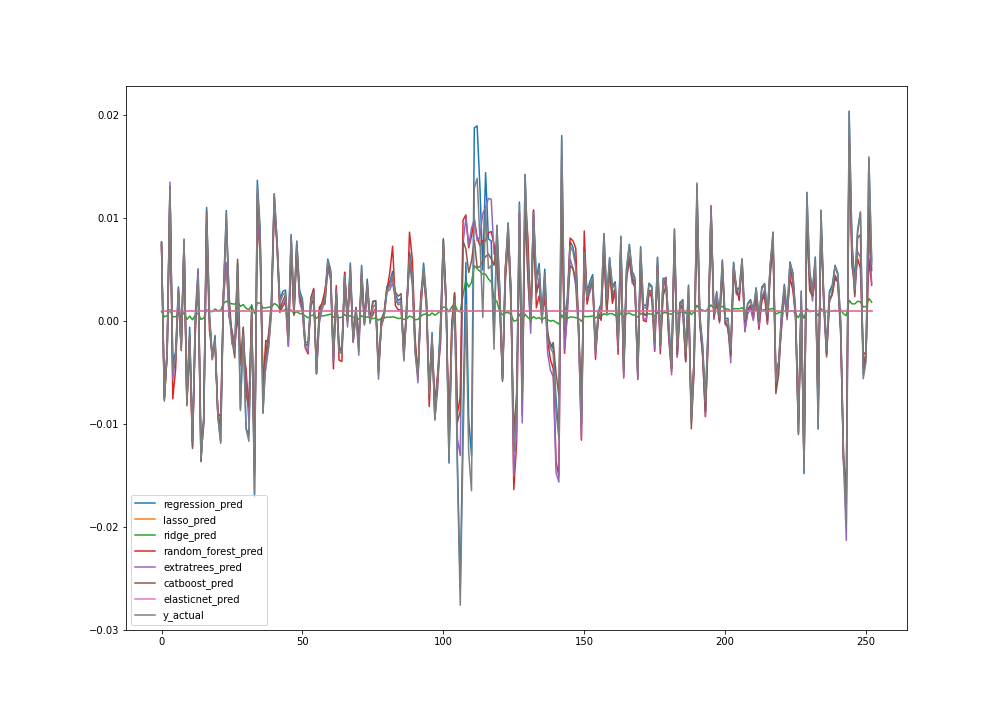

<AxesSubplot:>

In [84]:
prediction_df.plot(figsize=(14,10))

In [85]:
performace_metrics(prediction_df["y_actual"], prediction_df[prediction_df.columns.tolist()[:-1]].transpose().values.tolist(),
                  prediction_df.columns.tolist()[:-1])

,R2 coeff,mae,mape,rmse
regression_pred,0.980478,0.000470,0.553834,8.867479e-07
lasso_pred,-0.000473,0.005012,1.593988,4.544509e-05
ridge_pred,0.047713,0.004885,1.432659,4.325631e-05
random_forest_pred,0.751141,0.001598,1.108898,1.130407e-05
extratrees_pred,0.786870,0.001348,0.853742,9.681132e-06
catboost_pred,0.810886,0.001265,0.448318,8.590240e-06
elasticnet_pred,-0.000473,0.005012,1.593988,4.544509e-05


In [120]:
def super_learner(model_dict, super_learner, train_set, test_set, feature_names, target_col, super_learner_name):
    train_data = pd.DataFrame(train_set[0])
    train_data.columns = feature_names
    
    test_data = pd.DataFrame(test_set[0])
    test_data.columns = feature_names
    
    empty_df = pd.DataFrame()
    test_col_name = []
    # Super learner training
    for model_name, model in model_dict.items():
        model.fit(train_data, train_set[1])
        predictions = model.predict(train_data)
        empty_df["{}_pred".format(model_name)] = predictions
        model_dict[model_name] = model
        
    super_learner.fit(empty_df, train_set[1])
    
    # Super learner prediction
    empty_df = pd.DataFrame()
    for model_name, model in model_dict.items():
        predictions = model.predict(test_data)
        empty_df["{}_pred".format(model_name)] = predictions
    empty_df["{}_pred".format(super_learner_name)] = super_learner.predict(empty_df)
    empty_df[target_col] = test_set[1]
    model_dict["super_learner_{}".format(super_learner_name)]= super_learner
    return empty_df, model_dict

In [121]:
final_pred, model_info = super_learner(model_dict, linear_model.LinearRegression(), train_data, test_data, 
                           used_features, "y_actual","OLS")

In [122]:
final_pred

,regression_pred,lasso_pred,ridge_pred,random_forest_pred,extratrees_pred,catboost_pred,elasticnet_pred,OLS_pred,y_actual
0,0.007700,0.000934,0.000924,0.007379,0.007306,0.007540,0.000934,0.007306,0.007520
1,-0.007245,0.000934,0.000401,-0.007862,-0.006849,-0.007532,0.000934,-0.006849,-0.007498
2,-0.002906,0.000934,0.000519,-0.002935,-0.002928,-0.003366,0.000934,-0.002928,-0.003275
3,0.013024,0.000934,0.001090,0.012417,0.013531,0.012259,0.000934,0.013531,0.012873
4,-0.004082,0.000934,0.000394,-0.008665,-0.005198,-0.004717,0.000934,-0.005198,-0.004754
...,...,...,...,...,...,...,...,...,...
248,0.010579,0.000934,0.001873,0.004917,0.006530,0.008398,0.000934,0.006530,0.010564
249,-0.005191,0.000934,0.001373,-0.003387,-0.004201,-0.004502,0.000934,-0.004201,-0.005604
250,-0.003482,0.000934,0.001394,-0.002843,-0.003634,-0.002986,0.000934,-0.003634,-0.003914
251,0.015811,0.000934,0.002182,0.006206,0.007297,0.011132,0.000934,0.007297,0.015943


In [123]:
performace_metrics(final_pred["y_actual"], final_pred[final_pred.columns.tolist()[:-1]].transpose().values.tolist(),
                  final_pred.columns.tolist()[:-1])

,R2 coeff,mae,mape,rmse
regression_pred,0.980478,0.000470,0.553834,8.867479e-07
lasso_pred,-0.000473,0.005012,1.593988,4.544509e-05
ridge_pred,0.047713,0.004885,1.432659,4.325631e-05
random_forest_pred,0.745033,0.001567,1.086688,1.158149e-05
extratrees_pred,0.781018,0.001294,0.759168,9.946939e-06
catboost_pred,0.810886,0.001265,0.448318,8.590240e-06
elasticnet_pred,-0.000473,0.005012,1.593988,4.544509e-05
OLS_pred,0.781018,0.001294,0.759168,9.946939e-06


In [125]:
model_dict["super_learner_OLS"].coef_

array([ 3.05394493e-15, -5.66213743e-15,  2.98372438e-16,  4.44089210e-16,
        1.00000000e+00, -1.38777878e-15, -4.48942104e-31])

In [150]:
model_dict = {}
model_dict["random_forest"] = rf
model_dict["extratrees"] = et
model_dict["catboost"] = cat
model_dict["elasticnet"] = elasticnet
model_dict["regression"] = reg
model_dict["lasso"] = lasso
model_dict["ridge"] = ridge

In [151]:
final_pred, model_info = super_learner(model_dict, linear_model.LinearRegression(), train_data, test_data, 
                           used_features, "y_actual","OLS")

In [152]:
performace_metrics(final_pred["y_actual"], final_pred[final_pred.columns.tolist()[:-1]].transpose().values.tolist(),
                  final_pred.columns.tolist()[:-1])

,R2 coeff,mae,mape,rmse
random_forest_pred,0.769328,0.001523,0.873014,1.047794e-05
extratrees_pred,0.775347,0.001288,0.628005,1.020453e-05
catboost_pred,0.810886,0.001265,0.448318,8.590240e-06
elasticnet_pred,-0.000473,0.005012,1.593988,4.544509e-05
regression_pred,0.980478,0.000470,0.553834,8.867479e-07
lasso_pred,-0.000473,0.005012,1.593988,4.544509e-05
ridge_pred,0.047713,0.004885,1.432659,4.325631e-05
OLS_pred,0.775347,0.001288,0.628005,1.020453e-05


In [153]:
## Visualize results
final_pred["mean"] = final_pred[["random_forest_pred", "extratrees_pred", "catboost_pred", 
                                 "elasticnet_pred", "regression_pred"]].mean(axis=1)
final_pred["median"] = final_pred[["random_forest_pred", "extratrees_pred", "catboost_pred", 
                                 "elasticnet_pred", "regression_pred"]].median(axis=1)

In [154]:
model_names = ['random_forest_pred', 'extratrees_pred', 'catboost_pred',
       'elasticnet_pred', 'regression_pred', 'lasso_pred', 'ridge_pred',
       'OLS_pred', 'mean', 'median']

In [155]:
performace_metrics(final_pred["y_actual"], final_pred[model_names].transpose().values.tolist(),model_names)

,R2 coeff,mae,mape,rmse
random_forest_pred,0.769328,0.001523,0.873014,1.047794e-05
extratrees_pred,0.775347,0.001288,0.628005,1.020453e-05
catboost_pred,0.810886,0.001265,0.448318,8.590240e-06
elasticnet_pred,-0.000473,0.005012,1.593988,4.544509e-05
regression_pred,0.980478,0.000470,0.553834,8.867479e-07
lasso_pred,-0.000473,0.005012,1.593988,4.544509e-05
ridge_pred,0.047713,0.004885,1.432659,4.325631e-05
OLS_pred,0.775347,0.001288,0.628005,1.020453e-05
mean,0.823663,0.001604,0.477985,8.009851e-06
median,0.811552,0.001186,0.445052,8.560007e-06


In [173]:
test_date = data.index[[data.index >= end_date][0]].tolist()

In [174]:
final_pred["date"] = test_date

In [176]:
final_pred.set_index("date",inplace=True)

<IPython.core.display.Javascript object>


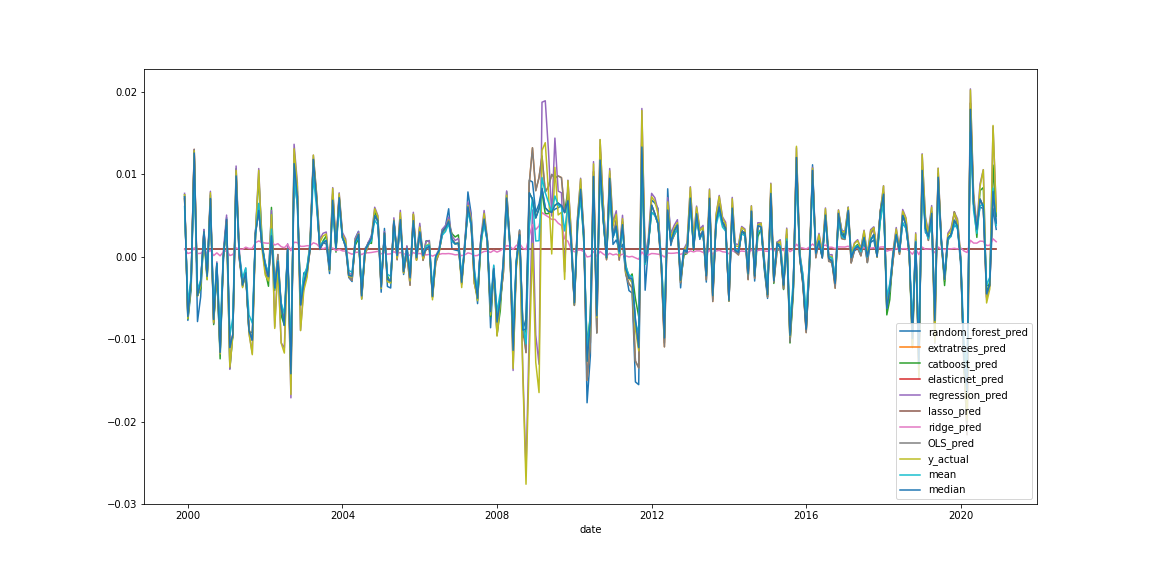

<AxesSubplot:xlabel='date'>

In [180]:
final_pred.plot(figsize=(16,8))

In [181]:
final_pred.corr()

,random_forest_pred,extratrees_pred,catboost_pred,elasticnet_pred,regression_pred,lasso_pred,ridge_pred,OLS_pred,y_actual,mean,median
random_forest_pred,1.000000,0.981856,0.966963,NaN,0.889939,NaN,0.391448,0.981856,0.877477,0.980836,0.986508
extratrees_pred,0.981856,1.000000,0.972930,NaN,0.902416,NaN,0.467687,1.000000,0.880774,0.986005,0.987788
catboost_pred,0.966963,0.972930,1.000000,NaN,0.916366,NaN,0.381091,0.972930,0.904436,0.985876,0.990641
elasticnet_pred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regression_pred,0.889939,0.902416,0.916366,NaN,1.000000,NaN,0.343954,0.902416,0.992578,0.953454,0.917945
lasso_pred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ridge_pred,0.391448,0.467687,0.381091,NaN,0.343954,NaN,1.000000,0.467687,0.254475,0.404477,0.381109
OLS_pred,0.981856,1.000000,0.972930,NaN,0.902416,NaN,0.467687,1.000000,0.880774,0.986005,0.987788
y_actual,0.877477,0.880774,0.904436,NaN,0.992578,NaN,0.254475,0.880774,1.000000,0.939927,0.905990
mean,0.980836,0.986005,0.985876,NaN,0.953454,NaN,0.404477,0.986005,0.939927,1.000000,0.992708
